## Labo Week 3 : Pandas 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#### Deel 1 : Basic Pandas

Een Pandas Dataframe is een datastructuur om 2 dimensionele data met bijbehorende labels voor rijen en kolommen te bewaren. Je kan ze zeker vergelijken met SQL-tabellen maar de verwerking ervan en het gebruik is eenvoudiger en sneller.

Een Pandas Serie is een 1 dimensionale array met bijbehorend label. Ze vormen de basisblokken van een dataframe, dus bekijken we deze eerst.


__Oefening 1__ Pandas Series basics

**1.1**  Genereer een serie1 vertrekkende van een lijst. Maak een eerst een lijst aan met alle letters van het alfabet. Zet deze lijst om naar een serie. Druk de eerste en laatste elementen van de serie uit. Vraag apart de labels en de waarden van de serie op.

**1.2**  Genereer een serie2 vertrekkende van een numpy array. Maak eerst een numpy array met hierin de cijfers van 1 tot 26. Zet deze array om naar een serie. Druk de eerste en laatste elementen van de serie uit. Labels hoeven zeker niet numeriek te zijn. Gebruik nu hoofdletters van het alfabet als label/ index waarden voor serie2. 

**1.3** Genereer een serie3 vertrekkende van een dict. Maak eerst een dictionary met als key de cijfers van 1 tot 26 en als value de letters van het alfabet. Zet deze dict om naar een serie. Druk de eerste en laatste elementen van de serie uit. Vraag de shape en de dimensies op van deze serie en geef de index en data values van serie 3 een naam (name attribute).

**1.4** Selecteren en bewerken van elementen in een serie :

    * geef alle elementen van serie1 die zich op index posities $0,4,8,14$ en $20$ bevinden
    * geef alle klinkers uit serie1, doe dit via de `isin` membership functie
    * geef alle elementen van serie2 die zich op het label 'M', 'N', 'O' en 'P' bevinden
    * geef alle elementen van serie3 vanaf index positie 12
    * geef alle elementen van serie1 die ook in serie 3 aanwezig zijn
    * geef alle elementen van serie2 die niet in serie 3 aanwezig zijn
    * verdubbel elke waarde van serie 2
    * Sorteer de elementen van serie3 in omgekeerde volgorde van het label / index

_Tip_ zie ook <https://towardsdatascience.com/a-practical-introduction-to-pandas-series-9915521cdc69>


In [2]:
letters = [chr(ord('a')+x) for x in range(26)]
numbers = np.array([x for x in range(1,27)])# np.arange(1,27)
dictionary = {key:value for (key,value) in zip(numbers,letters)}
serie1 = pd.Series(letters)
serie2 = pd.Series(numbers, index=letters)
#serie3 = pd.Series(numbers, index = letters)
serie3 = pd.Series(dictionary)

In [3]:
serie1.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [4]:
serie2.tail()

v    22
w    23
x    24
y    25
z    26
dtype: int32

In [5]:
serie3.head()

1    a
2    b
3    c
4    d
5    e
dtype: object

In [6]:
serie1[[0,4,8,14,20]]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [7]:
serie1[serie1.isin(['a','e','i','o','u'])]

0     a
4     e
8     i
14    o
20    u
dtype: object

In [8]:
serie3.name = "letters"
serie3.index.name = "volgnummer"
serie3.head()

volgnummer
1    a
2    b
3    c
4    d
5    e
Name: letters, dtype: object

In [9]:
serie2[['m','n','o','p']]

m    13
n    14
o    15
p    16
dtype: int32

In [10]:
serie3[12:]#vanaf index* 12

volgnummer
13    m
14    n
15    o
16    p
17    q
18    r
19    s
20    t
21    u
22    v
23    w
24    x
25    y
26    z
Name: letters, dtype: object

In [11]:
print(serie1[serie1.isin(serie3)].head())#so happens to be all
print(serie2[~serie2.isin(serie3)].head())#not met ~

0    a
1    b
2    c
3    d
4    e
dtype: object
a    1
b    2
c    3
d    4
e    5
dtype: int32


In [12]:
#res = serie2*2
#res
print(serie2.apply(lambda x: x*2).head())#niet in place

a     2
b     4
c     6
d     8
e    10
dtype: int64


In [13]:
print(serie3.sort_values(ascending=False).head())#inplace=False
print(serie3.head())

volgnummer
26    z
25    y
24    x
23    w
22    v
Name: letters, dtype: object
volgnummer
1    a
2    b
3    c
4    d
5    e
Name: letters, dtype: object


__Oefening 2__ Pandas Dataframe basics

**2.1** Maak volgende datastructuren aan :

    * Een pandas serie met 20 stukken fruit random opgevuld uit dit lijstje : apple, lemon, banana, kiwi, strawberry, pineapple. Uiteraard zal deze serie dubbels bevatten
    
    * Een pandas serie met 20 random gewichten in g voor deze stukken fruit. Gebruik 1 van de numpy $random$ methodes om 20 random gewichten te genereren.
    
    * Een dictionary met data over het vitamine C gehalte van deze stukken fruit. Per 100 gr zijn dit de vitamine C gehaltes van de stukken fruit.
     apple: 4.6 mg,  lemon: 53mg , banana: 8.7 mg, kiwi: 92.7 mg, strawberry : 58.8 mg, pineapple: 47,8 mg. 

**2.2** Maak een dataframe op basis van de 2 series. Vraag afzonderlijk de rij en kolom labels op. Vraag tevens dimensie, size en shape op.

**2.3** Gebruik zowel `.loc` als `.iloc` om volgende data uit de dataframe te selecteren :

    * Selecteer alle data uit de kolom 'fruit'
    * Selecteer alle data uit de rijen 5 t.e.m 8
    * Selecteer alle rijen met even index
    * Selecteer allen de data uit de 'weights' kolom en dit voor de laatste 4 rijen.

**2.4** Voeg een extra kolom 'total_vitamines' toe aan je dataframe met het juiste vitamine C gehalte voor de gegeven hoeveelheid van een bepaalde fruitsoort. 

**2.5** Geef per soort fruit het gemiddeld gewicht en het gemiddeld aantal vitamines aanwezig in de dataset. 

**2.6** Verwijder alle rijen uit de tabel, die van type banaan zijn. Verwijder tenslotte ook de kolom 'weights' uit je tabel.

In [14]:
N=20
fruit = pd.Series(random.choices(['apple','lemon','banana','kiwi','strawberry','pineapple'],k=N))
gewichten = pd.Series(np.absolute(np.random.randn(N)))
vitC = {"apple":4.6,'lemon':"53",'banana':8.7,'kiwi':92.7, 'strawberry':58.8,"pineapple":47.8}# mg vit C per 100 g

In [15]:
df = pd.DataFrame({'fruit':fruit, 'gewichten':gewichten})
print(df['fruit'].head()) # df['gewichten']
print(df.iloc[0])
print(df.loc[:,'fruit'])

0        banana
1          kiwi
2    strawberry
3        banana
4     pineapple
Name: fruit, dtype: object
fruit          banana
gewichten    0.303338
Name: 0, dtype: object
0         banana
1           kiwi
2     strawberry
3         banana
4      pineapple
5      pineapple
6          apple
7          lemon
8           kiwi
9          apple
10         lemon
11        banana
12        banana
13     pineapple
14         lemon
15         apple
16          kiwi
17          kiwi
18    strawberry
19     pineapple
Name: fruit, dtype: object


In [16]:
df[5:9]#indexen 5-8
df.loc[5:9] # by label
df.iloc[5:9]#by index

,fruit,gewichten
5,pineapple,0.433189
6,apple,1.078361
7,lemon,0.509410
8,kiwi,1.939891


In [17]:
df[::2]# even indexen
#idem .loc, .iloc

,fruit,gewichten
0,banana,0.303338
2,strawberry,0.765805
4,pineapple,0.331047
6,apple,1.078361
8,kiwi,1.939891
10,lemon,0.353809
12,banana,1.430409
14,lemon,0.561001
16,kiwi,0.589032
18,strawberry,0.097230


In [18]:
# Selecteer allen de data uit de 'weights' kolom en dit voor de laatste 4 rijen.
df['gewichten'][-4:]

16    0.589032
17    1.229063
18    0.097230
19    1.945635
Name: gewichten, dtype: float64

In [19]:
# Voeg een extra kolom 'total_vitamines' toe aan je dataframe met het juiste vitamine C gehalte voor de gegeven hoeveelheid van een bepaalde fruitsoort.
# df['total_vitamines']
df['total_vitamines']=df.fruit.map(vitC).astype('float64')*df.gewichten

In [20]:
#Geef per soort fruit het gemiddeld gewicht en het gemiddeld aantal vitamines aanwezig in de dataset.
set(df['fruit'])
#averages = [df[df['fruit']==key]['total_vitamines'].mean(axis=0) for key in set(df['fruit'])]
#averages = {key:value for (key,value) in zip(set(df['fruit']),averages)}
#averages
df.groupby("fruit").mean()

,gewichten,total_vitamines
fruit,,
apple,1.024588,4.713103
banana,0.808775,7.036344
kiwi,1.300892,120.592705
lemon,0.474740,25.161229
pineapple,0.943878,45.117363
strawberry,0.431517,25.373216


In [21]:
if('gewichten' in df.columns):
    df.pop('gewichten')
df.drop(df[(df['fruit'] == 'banana')].index).reset_index(drop=True)
# alt df.drop('column name',axis='columns')

,fruit,total_vitamines
0,kiwi,134.005521
1,strawberry,45.029318
2,pineapple,15.824035
3,pineapple,20.706456
4,apple,4.960460
5,lemon,26.998753
6,kiwi,179.827908
7,apple,3.775567
8,lemon,18.751889
9,pineapple,50.937606


#### Deel 2 : Mergen, selecteren en groeperen van data

__Oefening 3__ Mergen en selecteren van data

Gegeven 3 csv files met hierin data over restaurantbezoeken : _ratings.csv_ , _payments_csv_ en _genres.csv_.

**3.1** Load deze files in als 3 aparte data frames en bekijk de gegevens in deze frames oa. via $head()$, $tail()$, $describe()$ en $info()$.

**3.2** Merge de 3 bovenstaande dataframes tot 1 grote dataframe.
Merk op een merge operatie op tabellen is net zoals een join in mysql, via het attribuut $how$ geef je aan of het over een $left$, $right$, $inner$ of $outer$ join gaat.
_Tip:_ zie ook :
https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join

**3.3** In de nieuwe samengevoegde dataframe mag je de rating kolom verwijderen. Deze kolom zullen we opnieuw berekenen aan de hand van een gewogen gemiddelde van de user zijn food_rating en de service_rating. Neem deze als volgt : $new\_rating = food\_rating * 0.7 + service\_rating * 0.3$ Maak gebruik van numpy.

**3.4** Geef de dataframe nu gesorteerd weer. Sorteer op de nieuwe berekende rating $new\_rating$. Wanneer ratings gelijk zijn, sorteer je op de $food\_rating$ kolom, wanneer ook deze gelijk zijn sorteer je op de $service\_rating$ kolom.

**3.5** Selecteer alle restaurants die een $new\_rating$ score gelijk aan 0 hebben. Tel voor elk van deze restaurants hoe vaak ze een score van 0 behaalde.


In [22]:
ratings = pd.read_csv('./ratings.csv')
genres = pd.read_csv('./genres.csv')
payments = pd.read_csv('./payments.csv')
'''
print(ratings.head(),end="\n\n")
print(genres.tail(),end="\n\n")
print(payments.describe(),end="\n\n")
ratings.info()
'''
pass

In [23]:
'''
 Merge de 3 bovenstaande dataframes tot 1 grote dataframe. Merk op een merge operatie op tabellen is net zoals een join in mysql, via het attribuut  ℎ𝑜𝑤
  geef je aan of het over een  𝑙𝑒𝑓𝑡, 𝑟𝑖𝑔ℎ𝑡, 𝑖𝑛𝑛𝑒𝑟 of  𝑜𝑢𝑡𝑒𝑟 join gaat.
  Tip: zie ook : https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join
'''
inner = pd.merge(pd.merge(ratings,genres,how='inner'),payments,how='inner')
outer = pd.merge(pd.merge(ratings,genres,how='outer'),payments,how='outer')
left = pd.merge(pd.merge(ratings,genres,how='left'),payments,how='left')
right = pd.merge(pd.merge(ratings,genres,how='right'),payments,how='right')

In [24]:
'''
 In de nieuwe samengevoegde dataframe mag je de rating kolom verwijderen. Deze kolom zullen we opnieuw berekenen aan de hand van een gewogen gemiddelde
 van de user zijn food_rating en de service_rating. Neem deze als volgt :  𝑛𝑒𝑤_𝑟𝑎𝑡𝑖𝑛𝑔=𝑓𝑜𝑜𝑑_𝑟𝑎𝑡𝑖𝑛𝑔∗0.7+𝑠𝑒𝑟𝑣𝑖𝑐𝑒_𝑟𝑎𝑡𝑖𝑛𝑔∗0.3 Maak gebruik van numpy.
'''
#gebruik inner
df = inner
df_noSR = df.drop('rating',axis="columns")
new_rating = df_noSR.food_rating*0.7+df.service_rating*0.3
new_rating = df_noSR.food_rating.to_numpy()*0.7 + df_noSR.service_rating.to_numpy()*0.3
df_noSR['new_rating'] = new_rating
df = df_noSR
#df = df_noSR.sort_values(["new_rating",'food_rating','service_rating'],ascending=[True,True,True])

In [25]:
df[df['new_rating']==0].groupby('placeID').count()['new_rating']

placeID
132560    2
132572    4
132583    1
132584    1
132594    1
         ..
135085    6
135086    6
135104    1
135106    4
135109    1
Name: new_rating, Length: 68, dtype: int64

__Oefening 4__ Grouperen van data

Werk opnieuw met de laatste versie van de dataframe uit oefening 3.


**4.1** Bereken voor elk restaurant zijn gemiddelde new_rating, min waarde van zijn new_rating en max-waarde van de new_rating. In je resultaat dataframe, hoe ziet de index er nu uit? Sorteer dit resultaat volgens het beste gemiddelde. 
Geef nu het best scorende restaurant samen met zijn genre weer.

**4.2** Ga na of er gebruikers zijn die hetzelfde restaurant meerdere malen beoordeeld hebben. Welke gebruiker heeft welk restaurant het vaakst beoordeeld?


In [26]:
intermediary = df.groupby('placeID')['new_rating']
i = pd.merge(df,intermediary.mean().to_frame(),suffixes=('',"_mean"),on="placeID")
i = pd.merge(i,intermediary.min().to_frame(),suffixes=('',"_min"),on="placeID")
i = pd.merge(i, intermediary.max().to_frame(),suffixes=('',"_max"),on="placeID")
df = i

#### Deel 3 : Data plotting met Pandas

Via een dataframe kan je ook heel eenvoudig plots maken. De plot functies `df.plot()`,  `df.plot.line()`, `df.plot.bar()`, `df.hist()`, `df.plot.scatter()`, `df.plot.pie()`, ... zijn standaard voorzien. Under the hood maken deze uiteraard gebruik van de Matplotlib en geven beide hetzelfde resultaat, de code is echter iets minder omslachtig om deze functies aan te spreken via pandas.

__Oefening 5__ Bar plots via Pandas

**5.1** Plot de populaire genre restaurants uit t.o.v. hoe vaak ze vertegenwoordigd zijn in deze data. Toon alleen deze genres die minstens 5x voorkomen in de data. Voor zie op de x-as de verschillende genres en op de y-as de aantallen. Voorzien je plot van een titel, geef een label aan de assen en werk met kleuren.

**5.2** Maak een multibarplot: voor elk restauranttype geef je de 3 verschillende gemiddelde ratings weer. Welk restauranttype scoort gemiddeld best op new_rating? Welk type scoort gemiddeld best voor food_rating? Welk restauranttype scoort gemiddeld best voor service?

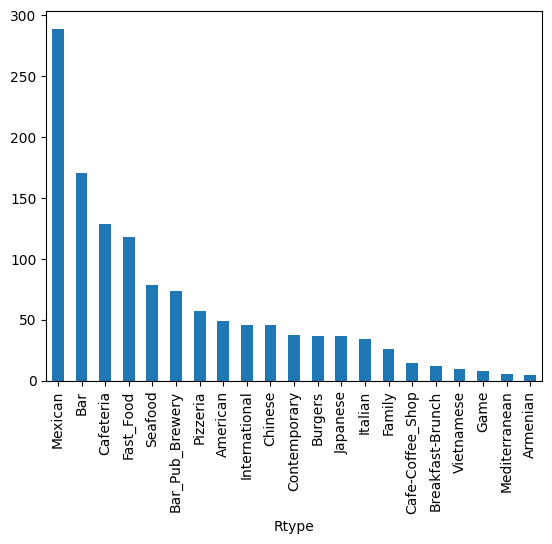

In [27]:
df.value_counts("Rtype")[df.value_counts("Rtype")>=5].plot.bar()#rtype=genre
plt.show()


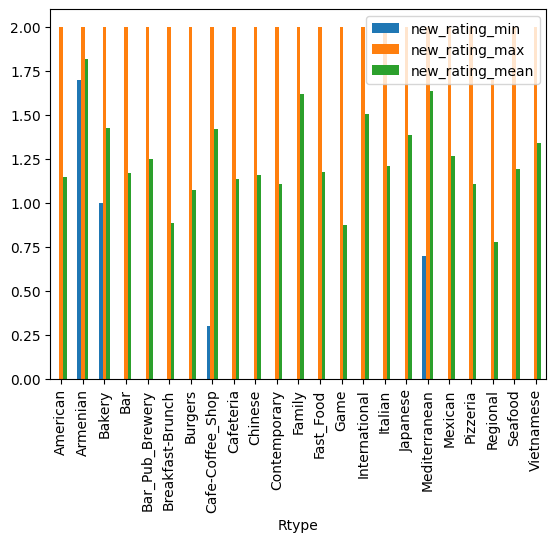

In [28]:
mean = df.groupby('Rtype')[['new_rating_mean']].mean()
min = df.groupby('Rtype')[['new_rating_min']].min()
max = df.groupby('Rtype')[['new_rating_max']].max()
min.join(max).join(mean).plot(kind='bar')
plt.show()

__Oefening 6__ Scatter plots en histograms

In een scatter plot toon je de xy-coördinaten van je data zonder dat deze verbonden zijn.

**6.1** Genereer volgende data : genereer een numpy array van 100 getallen die de lengte van een persoon voorstelt. Genereer deze volgens een random verdeling waarbij je als gemiddelde lengte 180 cm instelt met een standaardafwijking van 10. Genereer nu ook een gewicht voor elk van deze personen. Ga hierbij uit dat het gewicht = de lengte - 100  + error. De error heeft een gemiddelde correctie van 5 kilo meer of minder. Stop beide parameters in een dataframe.

**6.2** Plot de hoogte uit tov de lengte via een scatter plot. Ga na of er een relatie zit tussen lengte en gewicht door een rechte te plotten die de minste fouten maakt op deze data. Gebruik hiervoor de functie `np.polyfit` en `np.poly1d`, zie ook : <https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f>

**6.3** Herhaal 6.1 maar nu stel je de gemiddelde kleiner is zodat je eerste dataset de lengtes en gewichten voor mannen voorstelt, deze nieuwe dataset genereer je voor vrouwen, hierin stel je de gemiddelde lengte in op 165 cm, opnieuw met een standaard afwijking van 10. Het gewicht bereken je op dezelfde manier, alleen de error kan groter worden namelijk een gemiddelde afwijking van 8 kilo's . Breid je dataframe uit, met telkens een kolom hoogte en gewicht voor mannen en een kolom voor hoogte en gewicht voor vrouwen. Plot voor de vrouwen nu ook een scatter plot. Zie je hier een relatie ? Gebruik opnieuw de functie `np.polyfit` en `np.poly1d` om een lineair verband te visualiseren.

**6.3** Om de distributie van zowel de lengtes als het gewicht van zowel mannen als vrouwen te visualiseren, plot je van beide een histogram. Plot deze samen op 1 grafiek zodat je de vergelijking goed kan maken. Speel met de transparency parameter $alpha$ zodat ook de overlap duidelijk gezien kan worden.


C:\Users\User\AppData\Local\Temp\ipykernel_1700\295463334.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(heights, abline_values, 'b',color='red')


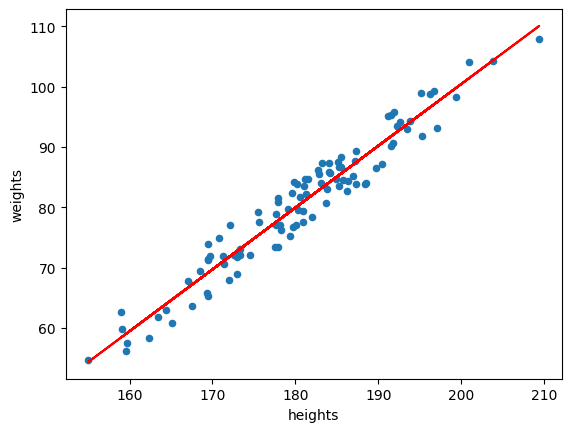

In [29]:
heights = np.random.normal(180,10,100)
gewichten = heights -100 + np.random.uniform(low=-5, high=5, size=(100,))
df = pd.DataFrame({'heights':heights,"weights":gewichten})
df.plot.scatter(x='heights',y="weights")
a,b = np.polyfit(heights, gewichten,1)
abline_values = [a * i + b for i in heights]
plt.plot(heights, abline_values, 'b',color='red')
plt.show()

#### Deel 4 : Data cleaning met Pandas

80\% van zijn tijd spendeert een data scientist aan het opkuisen van de data. Pandas is een ideale tool om data op te kuisen. In dit deel overlopen we verschillende handige data cleaning acties.

__Oefening 7__ 

**7.1** Lees de olympicsdata file in als een pandas dataframe. Hierbij mag je de eerste lijn overslaan omdata deze geen zinnige data bevat. Bekijk de info van deze file via de gekende functies : $head$, $info$, $describe$, ... Deze data is gebaseerd op de _unranked medal table_ uit <https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table>

**7.2** Merk op dat de kolomnamen niet eenduidig zijn. Wijzig deze zodat je logische kolomnamen bekomt.

**7.3** De eerste kolom bevat tekstdata met oa. de naam van een land / olympische deelname, alsook de code. Zorg ervoor dat de 3 letter code die tussen ronde haken staat de nieuwe index van de dataframe wordt. Verder kuis je de tekst in kolom1 op zodat alleen de naam van het land / deelname overblijft (het stuk tekst voor de ronde haak). Maak hier gebruik van de  `apply` functie.

**7.4** Ga na hoeveel data ontbreekt in je dataframe.  Maak hiertoe een nieuwe dataframe aan. De eerste kolom is het aantal ontbrekende waarden voor 
elke kolom. De tweede kolom is het percentage van ontbrekende waarden.

_Tip :_ gebruik de `isnull` methode.

**7.5**  Het percentage ontbrekende waarden is eigenlijk verwaarloosbaar. Daarom mag je elke ontbrekende waarde wijzigen naar 0. Test zelf of je operatie gelukt is door opnieuw het totaal aantal ontbrekende waarden in je Dataframe te tellen.

_Tip :_ gebruik de `fill_na` methode.

**7.6** Via `info` of `dtypes` kan je nagaan of de types van de data in de verschillende kolommen wel logisch is. Ga dit na en pas deze aan naar het meest logische type. Behalve de kolom die de landnaam voorstelt zijn alle andere data gewoon gehele getallen, int64 is dus prima!

In [49]:
colnames = ['Land', "#Summer Games", "Summer_1", "Summer_2","Summer_3", "Summer_Total",
                    "#Winter Games", "Winter_1", "Winter_2","Winter_3", "Winter_Total",
                    "#Combined Games", "Combined_1", "Combined_2","Combined_3", "Combined_Total"]
olympics = pd.read_csv("./olympicsdata2(1).csv",delimiter=";",skiprows=2, names=colnames)

In [54]:
def LandFormat(x):
        land, junk = x.split('(')
        code = junk.split(')')[0]
        return (land, code)

In [60]:
olympics['Code']=olympics['Land'].apply(lambda x: LandFormat(x)[1])
olympics['Land']=olympics['Land'].apply(lambda x: LandFormat(x)[0])
olympics

,Land,#Summer Games,Summer_1,Summer_2,Summer_3,Summer_Total,#Winter Games,Winter_1,Winter_2,Winter_3,Winter_Total,#Combined Games,Combined_1,Combined_2,Combined_3,Combined_Total,Code
0,Afghanistan,14,0.0,0,2,2,NaN,0.0,0.0,0.0,0.0,14,0.0,0.0,2.0,2,AFG
1,Algeria,13,5.0,4,8,17,3.0,0.0,0.0,0.0,0.0,16,5.0,4.0,8.0,17,ALG
2,Argentina,24,21.0,25,28,74,19.0,0.0,0.0,0.0,0.0,43,21.0,25.0,28.0,74,ARG
3,Armenia,6,2.0,6,6,14,7.0,0.0,0.0,0.0,0.0,13,2.0,6.0,6.0,14,ARM
4,Australasia,2,3.0,4,5,12,0.0,0.0,0.0,0.0,0.0,2,3.0,4.0,5.0,12,ANZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Zambia,13,0.0,1,1,2,0.0,0.0,0.0,0.0,0.0,13,0.0,1.0,1.0,2,ZAM
148,Zimbabwe,13,3.0,4,1,8,1.0,0.0,0.0,0.0,0.0,14,3.0,4.0,1.0,8,ZIM
149,Independent Olympic Athletes,3,1.0,0,1,2,0.0,0.0,0.0,0.0,0.0,3,1.0,NaN,1.0,2,IOA
150,Independent Olympic Participants,1,0.0,1,2,3,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,2.0,3,IOP


In [81]:
def countNA(df):
    nulls = df.isnull().sum()
    percent = nulls/len(df)*100
    return nulls.to_frame(name='null value count').join(percent.to_frame(name="percent nulls"))
countNA(olympics)

,null value count,percent nulls
Land,0,0.000000
#Summer Games,0,0.000000
Summer_1,2,1.315789
Summer_2,0,0.000000
Summer_3,0,0.000000
Summer_Total,0,0.000000
#Winter Games,4,2.631579
Winter_1,4,2.631579
Winter_2,1,0.657895
Winter_3,3,1.973684


In [86]:
filtered = olympics.fillna(0)#, inplace=True)
countNA(filtered)

,null value count,percent nulls
Land,0,0.0
#Summer Games,0,0.0
Summer_1,0,0.0
Summer_2,0,0.0
Summer_3,0,0.0
Summer_Total,0,0.0
#Winter Games,0,0.0
Winter_1,0,0.0
Winter_2,0,0.0
Winter_3,0,0.0


In [87]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Land             152 non-null    object 
 1   #Summer Games    152 non-null    int64  
 2   Summer_1         152 non-null    float64
 3   Summer_2         152 non-null    int64  
 4   Summer_3         152 non-null    int64  
 5   Summer_Total     152 non-null    int64  
 6   #Winter Games    152 non-null    float64
 7   Winter_1         152 non-null    float64
 8   Winter_2         152 non-null    float64
 9   Winter_3         152 non-null    float64
 10  Winter_Total     152 non-null    float64
 11  #Combined Games  152 non-null    int64  
 12  Combined_1       152 non-null    float64
 13  Combined_2       152 non-null    float64
 14  Combined_3       152 non-null    float64
 15  Combined_Total   152 non-null    int64  
 16  Code             152 non-null    object 
dtypes: float64(9), i

In [98]:
filtered.dtypes

Land                object
#Summer Games        int64
Summer_1           float64
Summer_2             int64
Summer_3             int64
Summer_Total         int64
#Winter Games      float64
Winter_1           float64
Winter_2           float64
Winter_3           float64
Winter_Total       float64
#Combined Games      int64
Combined_1         float64
Combined_2         float64
Combined_3         float64
Combined_Total       int64
Code                object
dtype: object

In [119]:
dtypes = filtered.dtypes
dtypes.values[dtypes.values!=np.dtype('O')] = np.dtype('int64')
filtered = filtered.astype(dtypes)
filtered.dtypes

Land               object
#Summer Games       int64
Summer_1            int64
Summer_2            int64
Summer_3            int64
Summer_Total        int64
#Winter Games       int64
Winter_1            int64
Winter_2            int64
Winter_3            int64
Winter_Total        int64
#Combined Games     int64
Combined_1          int64
Combined_2          int64
Combined_3          int64
Combined_Total      int64
Code               object
dtype: object